<a href="https://colab.research.google.com/github/popelucha/digital-humanities/blob/main/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings
Podívejme se, jak je význam zakódovaný ve word embeddings.

Dokumentace je zde: https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html


In [ ]:
import numpy as np
import gensim.downloader as api

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
model = api.load("glove-wiki-gigaword-50")

In [ ]:
api.info()

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

In [ ]:
# vector for known words
dog = model['car']
print(dog.shape)
print(dog)

(50,)
[ 0.47685  -0.084552  1.4641    0.047017  0.14686   0.5082   -1.2228
 -0.22607   0.19306  -0.29756   0.20599  -0.71284  -1.6288    0.17096
  0.74797  -0.061943 -0.65766   1.3786   -0.68043  -1.7551    0.58319
  0.25157  -1.2114    0.81343   0.094825 -1.6819   -0.64498   0.6322
  1.1211    0.16112   2.5379    0.24852  -0.26816   0.32818   1.2916
  0.23548   0.61465  -0.1344   -0.13237   0.27398  -0.11821   0.1354
  0.074306 -0.61951   0.45472  -0.30318  -0.21883  -0.56054   1.1177
 -0.36595 ]


In [ ]:
help(model)

Help on KeyedVectors in module gensim.models.keyedvectors object:

class KeyedVectors(gensim.utils.SaveLoad)
 |  KeyedVectors(vector_size, count=0, dtype=<class 'numpy.float32'>, mapfile_path=None)
 |  
 |  Method resolution order:
 |      KeyedVectors
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key)
 |  
 |  __getitem__(self, key_or_keys)
 |      Get vector representation of `key_or_keys`.
 |      
 |      Parameters
 |      ----------
 |      key_or_keys : {str, list of str, int, list of int}
 |          Requested key or list-of-keys.
 |      
 |      Returns
 |      -------
 |      numpy.ndarray
 |          Vector representation for `key_or_keys` (1D if `key_or_keys` is single key, otherwise - 2D).
 |  
 |  __init__(self, vector_size, count=0, dtype=<class 'numpy.float32'>, mapfile_path=None)
 |      Mapping between keys (such as words) and vectors for :class:`~gensim.models.Word2Vec`
 |      and related models.
 |

In [ ]:
# Deal with an out of dictionary word: Михаил (Michail)
if 'Михаил' in model:
    print(model['Михаил'].shape)
else:
    print('{0} is an out of dictionary word'.format('Михаил'))

Михаил is an out of dictionary word


In [ ]:
# vector similarity
model.most_similar("jaguar", topn=20)

[('xk', 0.7880734205245972),
 ('rover', 0.775028645992279),
 ('falcon', 0.7731289267539978),
 ('xjs', 0.7703999876976013),
 ('xkr', 0.7470771670341492),
 ('xj6', 0.7399177551269531),
 ('puma', 0.7315992116928101),
 ('xk8', 0.7143670320510864),
 ('xj', 0.7063968181610107),
 ('mustang', 0.7020478844642639),
 ('sepecat', 0.6995052695274353),
 ('sedan', 0.6786041259765625),
 ('xk120', 0.6775456070899963),
 ('xj220', 0.6709454655647278),
 ('e-type', 0.668567419052124),
 ('cadillac', 0.6671769618988037),
 ('sega', 0.6640884280204773),
 ('xjr', 0.6508543491363525),
 ('mondeo', 0.6488943696022034),
 ('v12', 0.647078812122345)]

In [ ]:
# Some predefined functions that show content related information for given words
print(model.most_similar(positive=['woman', 'king'], negative=['man']))


[('queen', 0.8523604273796082), ('throne', 0.7664334177970886), ('prince', 0.7592144012451172), ('daughter', 0.7473883628845215), ('elizabeth', 0.7460219860076904), ('princess', 0.7424570322036743), ('kingdom', 0.7337412238121033), ('monarch', 0.721449077129364), ('eldest', 0.7184861898422241), ('widow', 0.7099431157112122)]


In [ ]:
# Some predefined functions that show content related information for given words
print(model.most_similar(positive=['britain', 'berlin'], negative=['germany']))


[('london', 0.8685765266418457), ('british', 0.7753665447235107), ('sydney', 0.6951888203620911), ('opened', 0.6935645341873169), ('edinburgh', 0.690578281879425), ('blair', 0.6770884394645691), ('prohertrib', 0.6705284118652344), ('paris', 0.6646957993507385), ('international', 0.6595639586448669), ('vienna', 0.6526981592178345)]


In [ ]:
# Some predefined functions that show content related information for given words
print(model.most_similar(positive=['france', 'beer'], negative=['germany']))


[('champagne', 0.851976752281189), ('drinks', 0.834439754486084), ('drink', 0.8175836205482483), ('beers', 0.8047526478767395), ('bottled', 0.7993912696838379), ('wine', 0.7751240134239197), ('vodka', 0.7396015524864197), ('beverages', 0.739106297492981), ('brewed', 0.7388973236083984), ('ale', 0.7360824346542358)]


In [ ]:
# Some predefined functions that show content related information for given words
print(model.most_similar(positive=['jaguar'], negative=['car']))


[('yellow-eyed', 0.7645885944366455), ('xj8', 0.7144027352333069), ('xjs', 0.7072294354438782), ('xjr', 0.7008213400840759), ('reho', 0.7004984021186829), ('xj6', 0.6978343725204468), ('sepecat', 0.6680499911308289), ('gfc', 0.6639629006385803), ('xj220', 0.6625925898551941), ('ouimet', 0.6615090370178223)]


In [ ]:
x = (model['city']+model['britain']+model['westminster'])
print(cosine_similarity([x], [model['london']]))

[[0.8388381]]


In [ ]:
 model.similar_by_vector(x, topn=10, restrict_vocab=None)

[('london', 0.8388381004333496),
 ('in', 0.8380187153816223),
 ('opened', 0.8023003935813904),
 ('west', 0.8015338778495789),
 ('city', 0.7946631908416748),
 ('part', 0.7911143898963928),
 ('where', 0.7886185050010681),
 ('east', 0.7878355979919434),
 ('held', 0.7812442779541016),
 ('new', 0.7798982858657837)]

In [ ]:
print(model.doesnt_match("death delight delirium desire despair destiny destruction dream".split()))


delirium


In [ ]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))


cereal


In [ ]:
print(model.similarity('woman', 'man'))

0.8860338


# Je v tom magie?

https://www.researchgate.net/publication/332679657_Metaconcepts_Isolating_Context_in_Word_Embeddings

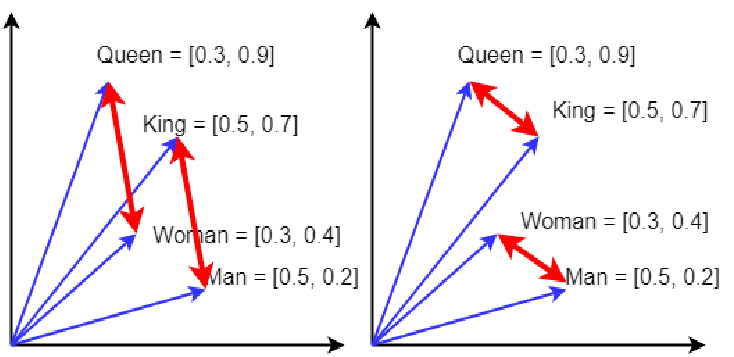

In [ ]:
v1 = model['queen']
v2 = model['king']
gender_change = v2-v1
v3 = model['woman']
v4 = model['man']

print("cosine similarity queen-king", cosine_similarity([v1], [v2]))
print("cosine similarity woman-man", cosine_similarity([v3], [v4]))
print("cosine similarity gender-change-woman-man", cosine_similarity([v3+gender_change], [v4]))

cosine similarity queen-king [[0.7839043]]
cosine similarity woman-man [[0.8860338]]
cosine similarity gender-change-woman-man [[0.87060666]]


In [ ]:
!pip install compress-fasttext[full]

# Compressed Models
Let's try some from https://zenodo.org/records/4905385

In [ ]:
import gensim
import compress_fasttext

In [ ]:
m = compress_fasttext.models.CompressedFastTextKeyedVectors.load('fasttext-cs-mini')

In [ ]:
type(m)

compress_fasttext.compress.CompressedFastTextKeyedVectors

In [ ]:
m.most_similar("jaguar", topn=20)

[('BMW', 0.34397847667296316),
 ('Romeo', 0.32179035423934116),
 ('Audi', 0.3180917180385469),
 ('automobilka', 0.3168419658764127),
 ('vůz', 0.30489487257924985),
 ('Johnny', 0.3043852203171347),
 ('auto', 0.3008478573190045),
 ('SUV', 0.2990117623485818),
 ('benzín', 0.29855281755316265),
 ('plot', 0.2975386581956121),
 ('Volkswagen', 0.29460507277853926),
 ('vozů', 0.2932022021556993),
 ('vozu', 0.29031136779444494),
 ('Porsche', 0.28977824904327326),
 ('motor', 0.2885117154496917),
 ('šampionát', 0.28703590238685495),
 ('modelů', 0.2863343829436737),
 ('Ford', 0.28601655518184527),
 ('Ferrari', 0.28154542819812123),
 ('Fiat', 0.28141098183224733)]

In [ ]:
m.most_similar(positive=['Bratislava', 'Vltava'], negative=['Praha'], topn=20)

[('Nitra', 0.37974412759069726),
 ('Labe', 0.37252080644672436),
 ('Bratislavě', 0.3632184011816346),
 ('Morava', 0.339258624023774),
 ('Slovensku', 0.3282379269035694),
 ('Slovenska', 0.32423271957688),
 ('Řeka', 0.31847280587367577),
 ('Poprad', 0.3160367662461779),
 ('Bystrica', 0.3135269412236826),
 ('Slovensko', 0.3053635680676401),
 ('řeka', 0.3026565769766381),
 ('Marina', 0.29952029111169826),
 ('Rádio', 0.2988152612162455),
 ('Juraj', 0.2979232860685962),
 ('Smetana', 0.2961783598070842),
 ('Moravy', 0.2953246306538546),
 ('River', 0.29505461895485174),
 ('Slovan', 0.29486439585920615),
 ('Košice', 0.29392294467764807),
 ('Trnava', 0.29141266951356204)]

In [ ]:
print(m.doesnt_match(["běžet", "ležet", "chodit", "tančit"]))

ležet
